# Import Libraries

In [1]:
import os
import time
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [2]:
os.getcwd()

'C:\\Users\\utkar\\YOLO'

In [71]:
#Clone yolov5 repository from ultralytics
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...


In [72]:
!cd yolov5 & pip install -r requirements.txt

In [9]:
import torch
# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\utkar/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-7-18 Python-3.9.12 torch-2.0.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [10]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [11]:
img = 'https://media.cntraveler.com/photos/53e2f41cdddaa35c30f66775/16:9/w_1280,c_limit/highway-traffic.jpg'

In [14]:
res = model(img)

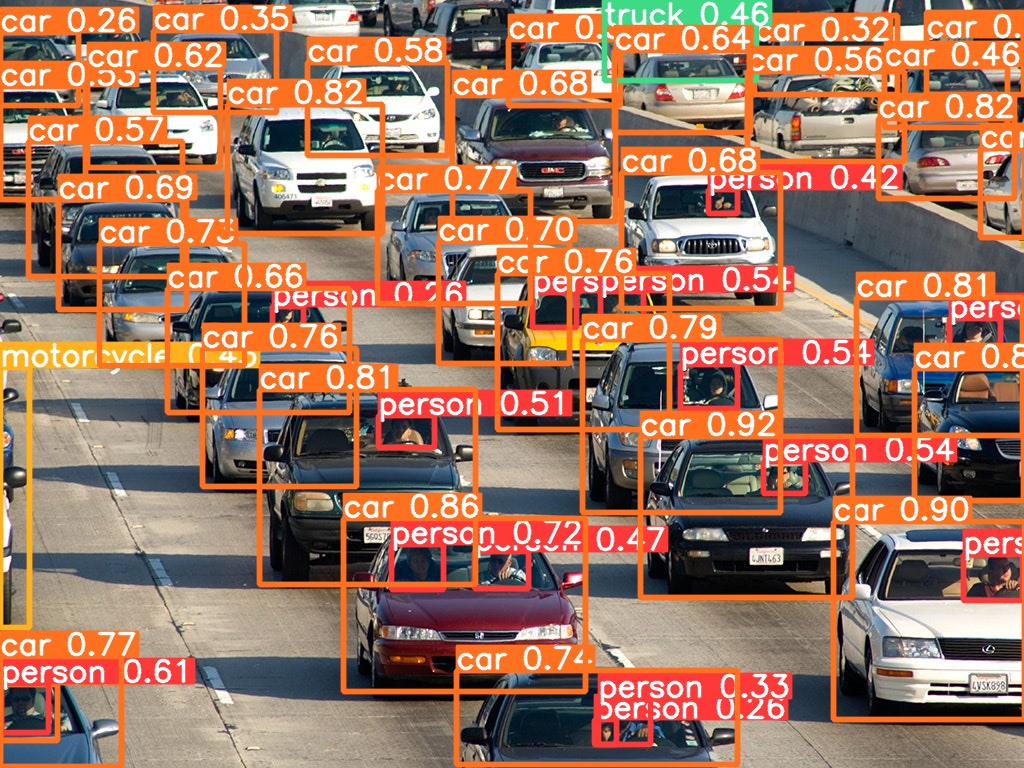

In [111]:
res.show()

In [110]:
res.render()

[array([[[ 60,  70,  79],
         [ 56,  66,  75],
         [ 53,  63,  72],
         ...,
         [ 55,  65,  77],
         [ 55,  63,  74],
         [ 56,  65,  74]],
 
        [[ 58,  68,  77],
         [ 54,  64,  73],
         [ 50,  60,  69],
         ...,
         [ 55,  65,  75],
         [ 53,  63,  73],
         [ 53,  62,  71]],
 
        [[ 56,  66,  75],
         [ 53,  63,  72],
         [ 49,  59,  68],
         ...,
         [ 52,  65,  74],
         [ 52,  62,  72],
         [ 49,  59,  69]],
 
        ...,
 
        [[255, 112,  31],
         [255, 112,  31],
         [255, 112,  31],
         ...,
         [161, 145, 129],
         [159, 143, 127],
         [158, 143, 124]],
 
        [[255, 112,  31],
         [255, 112,  31],
         [255, 112,  31],
         ...,
         [157, 141, 125],
         [158, 142, 126],
         [160, 144, 128]],
 
        [[255, 112,  31],
         [255, 112,  31],
         [255, 112,  31],
         ...,
         [151, 135, 119],
  

In [15]:
res.xyxy

[tensor([[6.40654e+02, 4.36777e+02, 8.52050e+02, 5.97026e+02, 9.15720e-01, 2.00000e+00],
         [8.33523e+02, 5.21314e+02, 1.02400e+03, 7.19699e+02, 9.00862e-01, 2.00000e+00],
         [3.43307e+02, 5.18850e+02, 5.85849e+02, 6.91249e+02, 8.62562e-01, 2.00000e+00],
         [9.14413e+02, 3.68111e+02, 1.02391e+03, 5.00440e+02, 8.54357e-01, 2.00000e+00],
         [8.78348e+02, 1.18899e+02, 1.01428e+03, 1.98658e+02, 8.18422e-01, 2.00000e+00],
         [2.27464e+02, 1.04710e+02, 3.82018e+02, 2.33567e+02, 8.15981e-01, 2.00000e+00],
         [8.56832e+02, 2.97138e+02, 1.02240e+03, 4.35603e+02, 8.09992e-01, 2.00000e+00],
         [2.59227e+02, 3.89023e+02, 4.75313e+02, 5.84724e+02, 8.05433e-01, 2.00000e+00],
         [9.80210e+02, 1.48539e+02, 1.02400e+03, 2.37785e+02, 8.01399e-01, 2.00000e+00],
         [5.82040e+02, 3.39581e+02, 7.80498e+02, 5.12379e+02, 7.85628e-01, 2.00000e+00],
         [5.78888e-01, 6.56951e+02, 1.21566e+02, 7.66381e+02, 7.69462e-01, 2.00000e+00],
         [3.77058e+02

In [112]:
os.getcwd()

'C:\\Users\\utkar\\YOLO'

# Data Set Collection

In [5]:
import uuid
IMAGES_PATH = os.path.join('andata','images')
labels = ['awake','drowsy']
number_imgs = 75

cap = cv2.VideoCapture(0)
for label in labels:
    print("Collecting images for {}".format(label))
    time.sleep(2)
    for imgnum in range(number_imgs):
        print("Collecting images for {}, image number {}".format(label,imgnum))
        ret, frame = cap.read()
        imgname = os.path.join(IMAGES_PATH,label + '.'+ str(uuid.uuid1()) + '.jpg')
        cv2.imwrite(imgname,frame)
        cv2.imshow('YOLO',frame)
        time.sleep(2)
    if cv2.waitKey(10) & 0xFF==ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [89]:
os.getcwd()

'C:\\Users\\utkar\\YOLO'

# LabelImg Setup 

In [59]:
!git clone https://github.com/tzutalin/labelImg

fatal: destination path 'labelImg' already exists and is not an empty directory.


In [58]:
!pip install pyqt5 lxml
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [115]:
os.getcwd()

'C:\\Users\\utkar\\YOLO'

# Training YoloV5

In [101]:
#Test1 
#!cd yolov5 && python train.py --img 400 --batch 16 --epochs 500 --data dataset.yml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=400, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 
YOLOv5  v7.0-193-g485da42 Python-3.9.12 torch-2.0.1+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, 

In [10]:
!cd yolov5 && python train.py --img 400 --batch 16 --epochs 70 --data andata.yml --weights yolov5s.pt --workers 2

wandb: WARNING  wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
wandb: Currently logged in as: utkarshvarman (yolorocks). Use `wandb login --relogin` to force relogin
train: weights=yolov5s.pt, cfg=, data=andata.yml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=70, batch_size=16, imgsz=400, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 
YOLOv5  v7.0-193-g485da42 Python-3.9.12 torch-2.0.1+cpu CPU

hyperparameters: lr0=0.01, l


val: Scanning C:\Users\utkar\YOLO\andata\labels.cache... 298 images, 0 backgrounds, 0 corrupt: 100%|##########| 298/298 [00:00<?, ?it/s]
val: Scanning C:\Users\utkar\YOLO\andata\labels.cache... 298 images, 0 backgrounds, 0 corrupt: 100%|##########| 298/298 [00:00<?, ?it/s]
wandb: WARNING  wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
wandb: Currently logged in as: utkarshvarman (yolorocks). Use `wandb login --relogin` to force relogin
wandb: WARNING  wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
wandb: Currently logged in as: utkarshvarman (yolorocks). Use `wandb login --relogin` to force relogin
wandb: WARNING  wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
wandb: Currently logged in as: utkarshvarm

      24/69         0G    0.03066   0.009119    0.01582         36        416:  84%|########4 | 16/19 [01:09<00:12,  4.07s/it]
      24/69         0G    0.03066   0.009119    0.01582         36        416:  89%|########9 | 17/19 [01:09<00:08,  4.07s/it]
      24/69         0G    0.03018   0.008957    0.01578         28        416:  89%|########9 | 17/19 [01:13<00:08,  4.07s/it]
      24/69         0G    0.03018   0.008957    0.01578         28        416:  95%|#########4| 18/19 [01:13<00:04,  4.07s/it]
      24/69         0G    0.02993   0.009039    0.01626         24        416:  95%|#########4| 18/19 [01:16<00:04,  4.07s/it]
      24/69         0G    0.02993   0.009039    0.01626         24        416: 100%|##########| 19/19 [01:16<00:00,  3.63s/it]
      24/69         0G    0.02993   0.009039    0.01626         24        416: 100%|##########| 19/19 [01:16<00:00,  4.03s/it]

                 Class     Images  Instances          P          R      mAP50   mAP50-95:   0%|          | 0/1

      42/69         0G    0.02129   0.007585    0.01028         33        416:  16%|#5        | 3/19 [00:11<01:02,  3.89s/it]
      42/69         0G    0.02009   0.007389    0.01122         36        416:  16%|#5        | 3/19 [00:15<01:02,  3.89s/it]
      42/69         0G    0.02009   0.007389    0.01122         36        416:  21%|##1       | 4/19 [00:15<00:58,  3.88s/it]
      42/69         0G    0.02097    0.00748    0.01069         31        416:  21%|##1       | 4/19 [00:19<00:58,  3.88s/it]
      42/69         0G    0.02097    0.00748    0.01069         31        416:  26%|##6       | 5/19 [00:19<00:53,  3.85s/it]
      42/69         0G    0.02144   0.007528    0.01153         37        416:  26%|##6       | 5/19 [00:23<00:53,  3.85s/it]
      42/69         0G    0.02144   0.007528    0.01153         37        416:  32%|###1      | 6/19 [00:23<00:50,  3.88s/it]
      42/69         0G    0.02226   0.007525    0.01154         31        416:  32%|###1      | 6/19 [00:27<00:50,  3.

In [3]:
#Load trained model
model = torch.hub.load('ultralytics/yolov5','custom',path='yolov5/runs/train/exp12/weights/last.pt',force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\utkar/.cache\torch\hub\master.zip
YOLOv5  2023-7-19 Python-3.9.12 torch-2.0.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


# Test Model

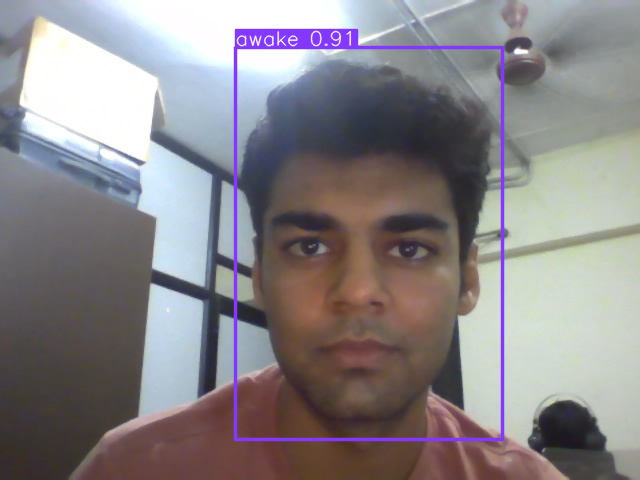

In [11]:
img = os.path.join('andata','images','awake.8d815496-20db-11ee-803b-34c93dec80e1.jpg')
results = model(img)
results.show()

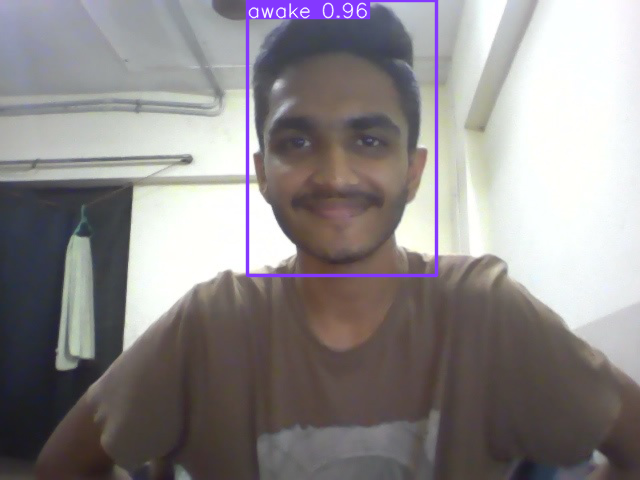

In [12]:
img = os.path.join('andata','images','awake.9c7dc9d0-20dc-11ee-8581-34c93dec80e1.jpg')
results = model(img)
results.show()

# Arduino Implementation

#  Setup Python-Arduino Communication

In [11]:
!pip install pyfirmata

In [163]:
from pyfirmata import Arduino, util
import time

In [ ]:
board = Arduino('COM11')

In [159]:
print(board.get_firmata_version)

<bound method Board.get_firmata_version of <pyfirmata.Arduino object at 0x0000023DE03EDA30>>


In [118]:
#print(board.get_firmata_version())

In [164]:
import cv2
import time
import pyfirmata
from torchvision.models import detection
import torch

# Set the threshold for drowsiness detection
drowsy_threshold = 0.5

# Initialize variables for drowsiness detection
drowsy_counter = 0
is_drowsy = False

# Set up pyFirmata communication with Arduino
board = pyfirmata.Arduino('COM11')  # Replace 'COM11' with the appropriate port
led_pin = board.get_pin('d:13:o')

# Start the video capture
cap = cv2.VideoCapture(0)  # Replace with your camera index if different from 0

while True:
    ret, frame = cap.read()

    # Perform object detection using YOLOv5
    results = model(frame)

    # Process the detection results
    for detection in results.pred[0]:
        class_id = detection[-1]
        confidence = detection[-2]

        if confidence > drowsy_threshold:
            if class_id == 0:  # Assuming class_id 0 represents a drowsy state
                if not is_drowsy:
                    drowsy_counter = time.time()
                    is_drowsy = True
                    cv2.rectangle(frame, (int(detection[0]), int(detection[1])),
                                  (int(detection[2]), int(detection[3])), (0, 0, 255), 2)
                    cv2.putText(frame, 'Drowsy', (int(detection[0]), int(detection[1]) - 10),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 255), 2)
            else:
                is_drowsy = False

    # Check if drowsy for more than 3 seconds and control the LED
    if is_drowsy and time.time() - drowsy_counter > 3:
        led_pin.write(1)  # Turn on the LED
        print("Drowsy detected. LED turned on.")
    else:
        led_pin.write(0)  # Turn off the LED

    cv2.imshow("Drowsiness Detection", frame)
    key = cv2.waitKey(1)
    if key == 27:  # Press 'Esc' to exit
        break

cap.release()
cv2.destroyAllWindows()
board.exit()
